# 1.Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statistics
sns.set(color_codes=True)
%matplotlib inline

# 2. Read the Data

In [3]:
Insurance_data = pd.read_csv("insurance.csv")

Insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


3.a.Shape of data Frame

In [4]:
Insurance_data.shape

(1338, 7)

3.b. Data type of each attribute

In [5]:
Insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


3.c.Checking the presence of missing values

In [6]:
Insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

3.c. 5 point summary

5 Point summary includes below:
    Mean,
    1st Quartile: The 25th percentile,
    3rd Quartile: The 75h percentile,
    Minimum: Smallest observation in the sample,
    Maximum: Largest observation in the sample

In [7]:
Insurance_data.mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [8]:
Insurance_data.quantile(0.25)

age           27.00000
bmi           26.29625
children       0.00000
charges     4740.28715
Name: 0.25, dtype: float64

In [9]:
Insurance_data.quantile(0.75)

age            51.000000
bmi            34.693750
children        2.000000
charges     16639.912515
Name: 0.75, dtype: float64

In [10]:
Insurance_data.min()

age                18
sex            female
bmi             15.96
children            0
smoker             no
region      northeast
charges       1121.87
dtype: object

In [11]:
Insurance_data.max()

age                64
sex              male
bmi             53.13
children            5
smoker            yes
region      southwest
charges       63770.4
dtype: object

3.e.Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

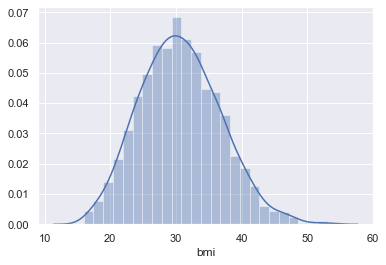

In [12]:
sns.distplot(Insurance_data["bmi"]);

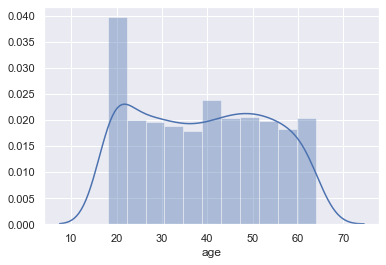

In [13]:
sns.distplot(Insurance_data["age"]);

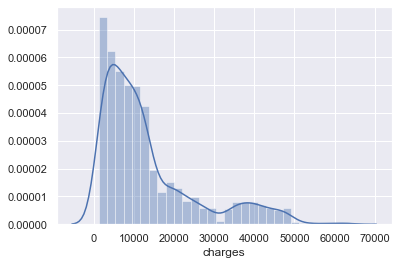

In [14]:
sns.distplot(Insurance_data["charges"]);

3.f.Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns 
3.gChecking the presence of outliers in ‘bmi’, ‘age’ and ‘charges
columns

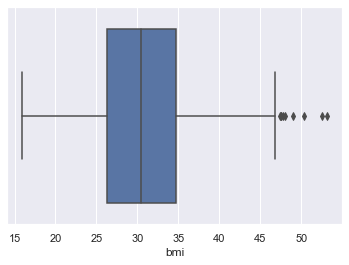

In [15]:
sns.boxplot(Insurance_data["bmi"]);

There is outliers present who are having bmi more than 47

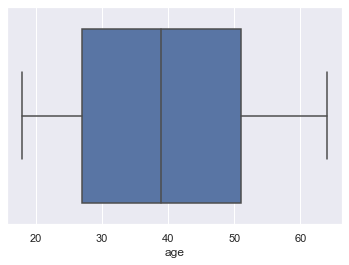

In [25]:
sns.boxplot(Insurance_data["age"]);

for age there is no outliers

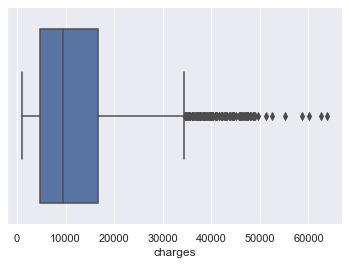

In [21]:
sns.boxplot(Insurance_data["charges"]);

There is an outliers present between charges 30000 to 40000

3.h.Distribution of categorical columns
3.i.Pair plot that includes all the columns of the data frame

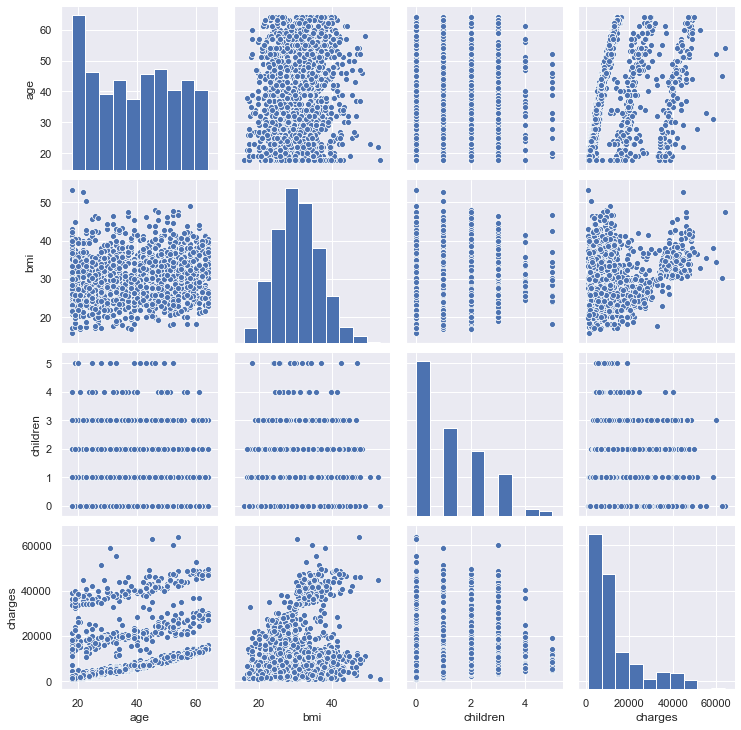

In [27]:
sns.pairplot(Insurance_data [['age','sex','bmi','children','smoker','region','charges']]);

4.a.Do charges of people who smoke differ significantly from the people who don’t?

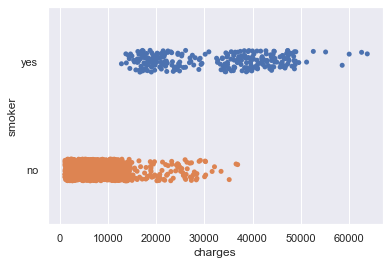

In [18]:
sns.stripplot(Insurance_data['charges'], Insurance_data['smoker']);



From the stripplot() between the two, there are certain values of ‘charges’ where there are people who smoke and there are people who do not smoke, but at the same time there are different charges for smokers and different charges for non smokers. People who smoke have high charges and the people who do not smoke have considerably very low charges. So, charges do differ for people who smoke from the people who do not smoke but not significantly as there is some intersection of values for both types of people.

b.Does ‘bmi’ of males differ significantly from that of females?

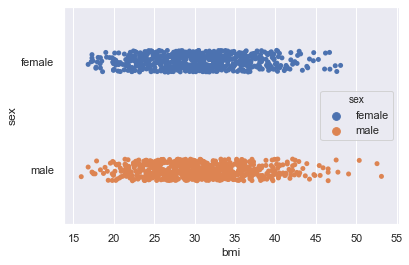

In [26]:
sns.stripplot(Insurance_data['bmi'], Insurance_data['sex'],hue= Insurance_data['sex']);



There is no significant difference in BMI for male and female genders, so no relationship exists between the two.

c. Is the proportion of smokers significantly different in different
genders?

In [25]:
print("Total count of smokers is ", Insurance_data[Insurance_data['smoker']=='yes'].shape[0]) 
print("Total count of male smokers is ", Insurance_data[Insurance_data['smoker']=='yes'][Insurance_data['sex']=='male'].shape[0]) 
print("Total count of female smokers is ", Insurance_data[Insurance_data['smoker']=='yes'][Insurance_data['sex']=='female'].shape[0]) 
print("Proportion of smokers who are male is ", (Insurance_data[Insurance_data['smoker']=='yes'][Insurance_data['sex']=='male'].shape[0])/Insurance_data[Insurance_data['smoker']=='yes'].shape[0]) 
print("Proportion of smokers who are female is ", (Insurance_data[Insurance_data['smoker']=='yes'][Insurance_data['sex']=='female'].shape[0])/Insurance_data[Insurance_data['smoker']=='yes'].shape[0])

Total count of smokers is  274
Total count of male smokers is  159
Total count of female smokers is  115
Proportion of smokers who are male is  0.5802919708029197
Proportion of smokers who are female is  0.4197080291970803


C:\Users\ADITI\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\ADITI\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ADITI\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ADITI\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


d. Is the distribution of bmi across women with no children, one child
and two children, the same

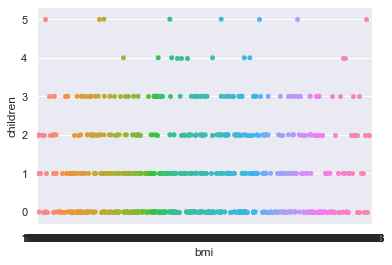

In [27]:
sns.stripplot(Insurance_data['bmi'], Insurance_data[Insurance_data['sex']=='female']['children'])